<a href="https://colab.research.google.com/github/TietNguyenHoangTanDat/AI-SangT5/blob/main/cifar10_week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from keras.datasets import cifar10
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

In [65]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Day la:  [4]


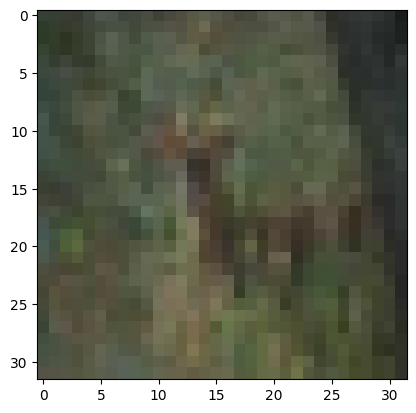

In [66]:
import matplotlib.pyplot as plt
hinh = train_images[10]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print("Day la: ", train_labels[10])

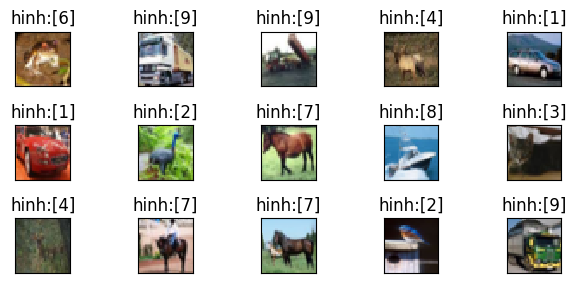

In [67]:
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray',interpolation = 'none')
  plt.title('hinh:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [68]:
from keras.engine.sequential import Sequential
from keras import models
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,activation='relu', input_shape=(32*32*3,), name = 'lop_1'))
model.add(Dense(10,activation = 'softmax', name = 'lop_m'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lop_1 (Dense)               (None, 512)               1573376   
                                                                 
 lop_m (Dense)               (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [69]:
train_images = train_images.reshape((50000,32*32*3))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,32*32*3))
test_images = test_images.astype('float32')/255
from keras.utils import to_categorical # one hot enread.ry
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [70]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_labels,epochs= 20, batch_size= 1024)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/20
49/49 [==============================] - 8s 139ms/step - loss: 3.6541 - accuracy: 0.1768
Epoch 2/20
49/49 [==============================] - 8s 159ms/step - loss: 2.2018 - accuracy: 0.2346
Epoch 3/20
49/49 [==============================] - 6s 131ms/step - loss: 2.0590 - accuracy: 0.2706
Epoch 4/20
49/49 [==============================] - 8s 158ms/step - loss: 1.9951 - accuracy: 0.2955
Epoch 5/20
49/49 [==============================] - 6s 132ms/step - loss: 1.9339 - accuracy: 0.3140
Epoch 6/20
49/49 [==============================] - 8s 159ms/step - loss: 1.8836 - accuracy: 0.3336
Epoch 7/20
49/49 [==============================] - 6s 131ms/step - loss: 1.8590 - accuracy: 0.3414
Epoch 8/20
49/49 [==============================] - 8s 158ms/step - loss: 1.8150 - accuracy: 0.3581
Epoch 9/20
49/49 [==============================] - 7s 134ms/step - loss: 1.7926 - accuracy: 0.3650
Epoch 10/20
49/49 [==============================] - 8s 154ms/step - loss: 1.7663 - accuracy: 0.3747

In [71]:
model.save('cifar10.h5')

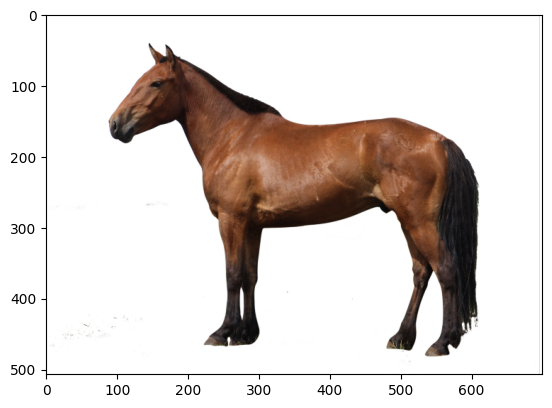

In [73]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np

from PIL import Image

img = Image.open('ngua.jpg')
imshow(img)


1/1 [==============================] - 0s 63ms/step


array([7])

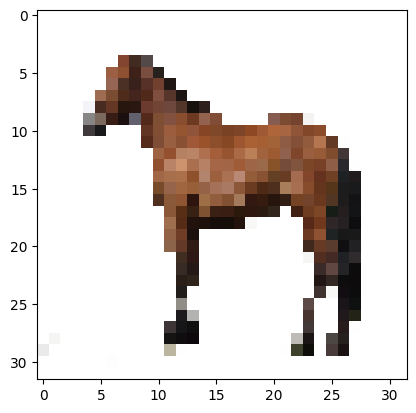

In [77]:
img = load_img('ngua.jpg', target_size= (32,32))
plt.imshow(img, cmap = 'gray',interpolation= 'none')
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)